In [ ]:
import pandas as pd

In [2]:
#leitura de arquivos
df1 = pd.read_excel("/content/drive/MyDrive/DataCienceDIO/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/DataCienceDIO/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/DataCienceDIO/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/DataCienceDIO/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/DataCienceDIO/datasets/Salvador.xlsx")

In [3]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
#consultando linhas com valores faltantes / nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
24,Salvador,2019-01-01,15.60,1034,2
233,Natal,2019-01-03,172.40,1036,2
67,Aracaju,2018-01-01,78.13,1521,4
117,Natal,2019-01-02,39.41,1034,1
72,Fortaleza,2019-01-01,106.72,1003,4
63,Aracaju,2018-01-01,39.87,1522,5
69,Recife,2019-01-01,38.83,981,1
99,Salvador,2019-01-01,40.38,1037,1
137,Recife,2019-03-02,51.99,983,3
105,Recife,2019-01-01,41.12,980,3


##Criando colunas novas

In [15]:
#criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#caso nao tenha a coluna quantidade poderiamos achar assim e criar um nova coluna
#df["Receita/|Vendas"] = df["Receita"] / df["Vendas"]

In [16]:
#retornnando a maior receita
df["Receita"].max()

3544.0

In [17]:
#retornnando a menor receita
df["Receita"].min()

3.34

In [18]:
#qual loja vendeu mais (top3)  com base na coluna receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [19]:
#qual loja vendeu menos (top3)  com base na coluna receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [20]:
#agrupamento por cidade em termos de receita
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [21]:
#ordenando o cunjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


##Trabalhando com datas

In [22]:
#transformando a coluna data em inteiro
df["Data"] = df["Data"].astype("int64")

In [23]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [24]:
#transformando a coluna data em data
df["Data"] = pd.to_datetime(df["Data"])

In [25]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [26]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
#criando uma coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [28]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
153,Salvador,2019-01-02,17.41,1035,2,34.82,2019
49,Aracaju,2018-01-01,53.74,1522,3,161.22,2018
85,Recife,2019-01-01,182.52,983,1,182.52,2019
48,Natal,2018-09-20,676.00,852,4,2704.00,2018
51,Natal,2018-01-21,859.00,852,4,3436.00,2018
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019
79,Recife,2019-01-01,14.53,983,6,87.18,2019
111,Aracaju,2018-01-01,24.25,1523,1,24.25,2018
36,Natal,2019-02-09,328.00,853,2,656.00,2019
118,Fortaleza,2019-03-02,17.70,981,5,88.50,2019


In [29]:
#extraindo mes e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [30]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
92,Natal,2019-01-02,4.57,1035,1,4.57,2019,1,2
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2
211,Natal,2019-01-02,141.05,1035,3,423.15,2019,1,2
32,Aracaju,2018-01-01,42.97,1522,6,257.82,2018,1,1
73,Recife,2019-01-01,39.71,981,5,198.55,2019,1,1
90,Aracaju,2018-01-01,16.27,1522,1,16.27,2018,1,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,2019,1,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2
4,Natal,2019-03-09,699.00,853,3,2097.00,2019,3,9


In [31]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [32]:
#calculando diferenca de dias
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
66,Recife,2019-01-01,14.59,983,7,102.13,2019,1,1,365 days
44,Recife,2019-01-01,142.21,983,8,1137.68,2019,1,1,365 days
129,Natal,2019-01-02,125.66,1037,1,125.66,2019,1,2,366 days
115,Natal,2019-01-02,202.33,1035,2,404.66,2019,1,2,366 days
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2019,1,1,365 days


In [33]:
#criando columa de  trimestre
df["Semestre_Venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Semestre_Venda
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,2,10,405 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
83,Recife,2019-01-01,143.61,983,6,861.66,2019,1,1,365 days,1
90,Salvador,2019-01-01,100.54,1036,2,201.08,2019,1,1,365 days,1
48,Natal,2018-09-20,676.00,852,4,2704.00,2018,9,20,262 days,3
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2019,1,1,365 days,1
51,Recife,2019-01-01,146.95,982,2,293.90,2019,1,1,365 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1


In [38]:
#filtrando as vendas do mes de marco de 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [39]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Semestre_Venda
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2019,3,30,453 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1
109,Salvador,2019-03-02,124.37,1035,1,124.37,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1


##visualizacao de dados

In [40]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

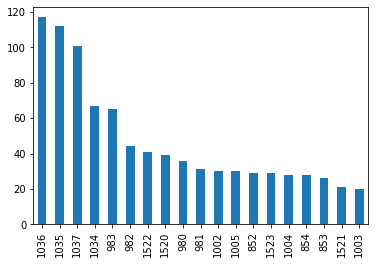

In [41]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

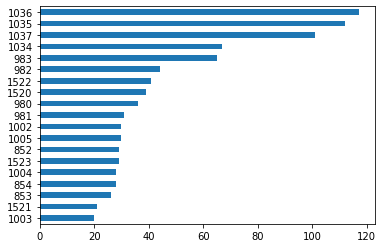

In [42]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

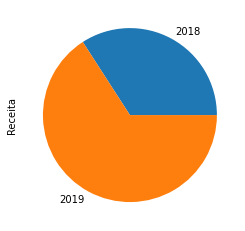

In [43]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [44]:
#total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

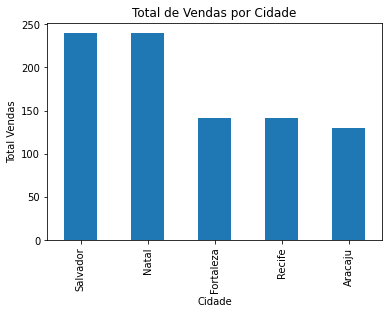

In [45]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

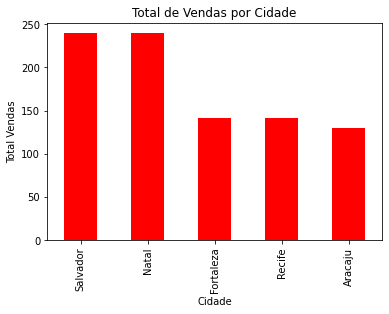

In [46]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="Red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [47]:
#alterando o estilo
plt.style.use("ggplot")

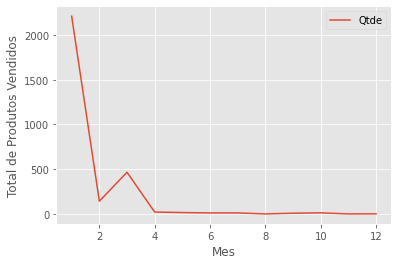

In [48]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot()
plt.xlabel("Mes")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

In [49]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [50]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [52]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

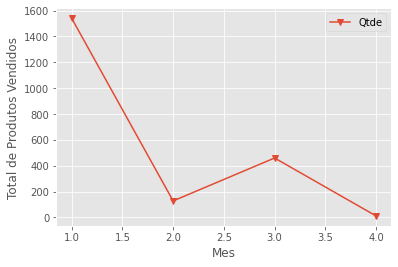

In [53]:
#total de produtos vendidos por mes
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

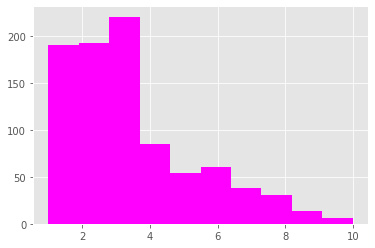

In [54]:
#histograma
plt.hist(df["Qtde"], color="magenta")

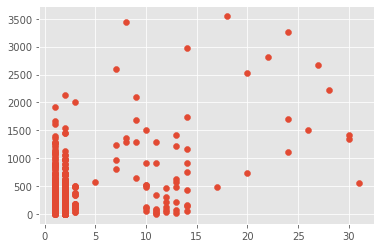

In [56]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"])

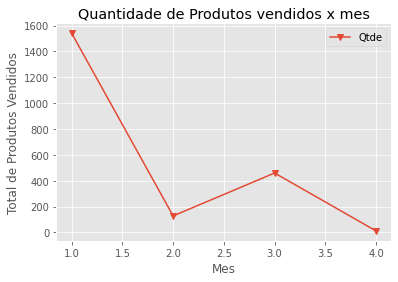

In [57]:
#salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x Mes.png")